# McDonald's Menu Analysis

### Dataset : menu.csv

#### Import  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Cleaning

In [3]:
# Load dataset
df = pd.read_csv("menu.csv")

In [4]:
# Preview
print(df.head())
print(df.info())

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [5]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
# Check missing values
print(df.isnull().sum())

category                         0
item                             0
serving_size                     0
calories                         0
calories_from_fat                0
total_fat                        0
total_fat_(%_daily_value)        0
saturated_fat                    0
saturated_fat_(%_daily_value)    0
trans_fat                        0
cholesterol                      0
cholesterol_(%_daily_value)      0
sodium                           0
sodium_(%_daily_value)           0
carbohydrates                    0
carbohydrates_(%_daily_value)    0
dietary_fiber                    0
dietary_fiber_(%_daily_value)    0
sugars                           0
protein                          0
vitamin_a_(%_daily_value)        0
vitamin_c_(%_daily_value)        0
calcium_(%_daily_value)          0
iron_(%_daily_value)             0
dtype: int64


In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Convert numeric columns
numeric_cols = df.columns.drop(["category", "item"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

In [9]:
# Handle missing values (median imputation)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [10]:
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (260, 24)


# 2. Descriptive Statistics

In [11]:
df.describe()

,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,cholesterol,cholesterol_(%_daily_value),...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)
count,0.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,NaN,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [10]:
from scipy import stats

In [11]:
# Basic statistics
desc_stats = df.describe()
print(desc_stats)


       serving_size     calories  calories_from_fat   total_fat  \
count           0.0   260.000000         260.000000  260.000000   
mean            NaN   368.269231         127.096154   14.165385   
std             NaN   240.269886         127.875914   14.205998   
min             NaN     0.000000           0.000000    0.000000   
25%             NaN   210.000000          20.000000    2.375000   
50%             NaN   340.000000         100.000000   11.000000   
75%             NaN   500.000000         200.000000   22.250000   
max             NaN  1880.000000        1060.000000  118.000000   

       total_fat_(%_daily_value)  saturated_fat  \
count                 260.000000     260.000000   
mean                   21.815385       6.007692   
std                    21.885199       5.321873   
min                     0.000000       0.000000   
25%                     3.750000       1.000000   
50%                    17.000000       5.000000   
75%                    35.000000      1

In [12]:
# Mean, Median, Mode, Std explicitly
summary = pd.DataFrame({
    "Mean": df[numeric_cols].mean(),
    "Median": df[numeric_cols].median(),
    "Mode": df[numeric_cols].mode().iloc[0],
    "Std Dev": df[numeric_cols].std()
})

print(summary)

                                     Mean  Median   Mode     Std Dev
serving_size                          NaN     NaN    NaN         NaN
calories                       368.269231   340.0    0.0  240.269886
calories_from_fat              127.096154   100.0    0.0  127.875914
total_fat                       14.165385    11.0    0.0   14.205998
total_fat_(%_daily_value)       21.815385    17.0    0.0   21.885199
saturated_fat                    6.007692     5.0    0.0    5.321873
saturated_fat_(%_daily_value)   29.965385    24.0    0.0   26.639209
trans_fat                        0.203846     0.0    0.0    0.429133
cholesterol                     54.942308    35.0    0.0   87.269257
cholesterol_(%_daily_value)     18.392308    11.0    0.0   29.091653
sodium                         495.750000   190.0  180.0  577.026323
sodium_(%_daily_value)          20.676923     8.0    6.0   24.034954
carbohydrates                   47.346154    44.0    0.0   28.252232
carbohydrates_(%_daily_value)   15

# 3. Time Series Analysis (Conditional)

In [13]:
print("No date/time column detected — time series analysis skipped.")

No date/time column detected — time series analysis skipped.


# 4. Customer and Product (Product-Focused) Analysis

In [14]:
# Category-level aggregation
category_analysis = df.groupby("category")[numeric_cols].mean()
print(category_analysis)

                    serving_size    calories  calories_from_fat  total_fat  \
category                                                                     
Beef & Pork                  NaN  494.000000         224.666667  24.866667   
Beverages                    NaN  113.703704           0.740741   0.092593   
Breakfast                    NaN  526.666667         248.928571  27.690476   
Chicken & Fish               NaN  552.962963         242.222222  26.962963   
Coffee & Tea                 NaN  283.894737          71.105263   8.021053   
Desserts                     NaN  222.142857          64.285714   7.357143   
Salads                       NaN  270.000000         108.333333  11.750000   
Smoothies & Shakes           NaN  531.428571         127.678571  14.125000   
Snacks & Sides               NaN  245.769231          94.615385  10.538462   

                    total_fat_(%_daily_value)  saturated_fat  \
category                                                       
Beef & Pork  

In [15]:
# Highest calorie items
top_calorie_items = df[["item", "calories"]].sort_values(by="calories", ascending=False).head(10)
print(top_calorie_items)

                                                  item  calories
82                        Chicken McNuggets (40 piece)      1880
32         Big Breakfast with Hotcakes (Large Biscuit)      1150
31       Big Breakfast with Hotcakes (Regular Biscuit)      1090
34   Big Breakfast with Hotcakes and Egg Whites (La...      1050
33   Big Breakfast with Hotcakes and Egg Whites (Re...       990
81                        Chicken McNuggets (20 piece)       940
253               McFlurry with M&M’s Candies (Medium)       930
249                            Chocolate Shake (Large)       850
246                           Strawberry Shake (Large)       850
251                             Shamrock Shake (Large)       820


In [16]:
# Correlation analysis
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

                               serving_size  calories  calories_from_fat  \
serving_size                            NaN       NaN                NaN   
calories                                NaN  1.000000           0.904588   
calories_from_fat                       NaN  0.904588           1.000000   
total_fat                               NaN  0.904409           0.999663   
total_fat_(%_daily_value)               NaN  0.904123           0.999725   
saturated_fat                           NaN  0.845564           0.847008   
saturated_fat_(%_daily_value)           NaN  0.847631           0.849592   
trans_fat                               NaN  0.522441           0.433686   
cholesterol                             NaN  0.596399           0.682161   
cholesterol_(%_daily_value)             NaN  0.595208           0.681607   
sodium                                  NaN  0.712309           0.846624   
sodium_(%_daily_value)                  NaN  0.713415           0.847276   
carbohydrate

# 5. Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

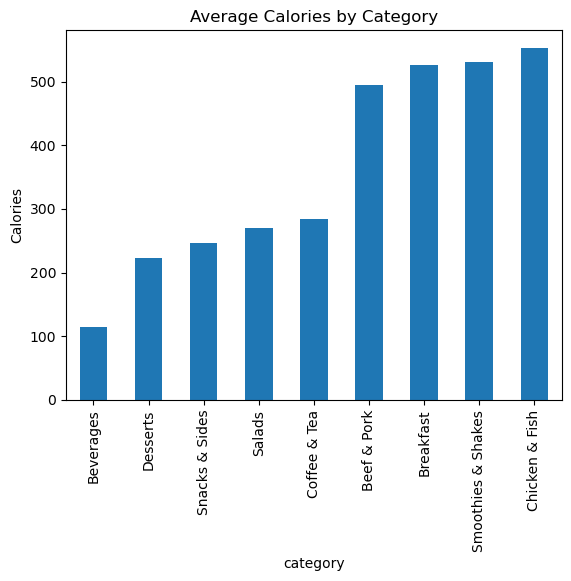

In [18]:
# Bar chart: Average calories by category
plt.figure()
df.groupby("category")["calories"].mean().sort_values().plot(kind="bar")
plt.title("Average Calories by Category")
plt.ylabel("Calories")
plt.show()

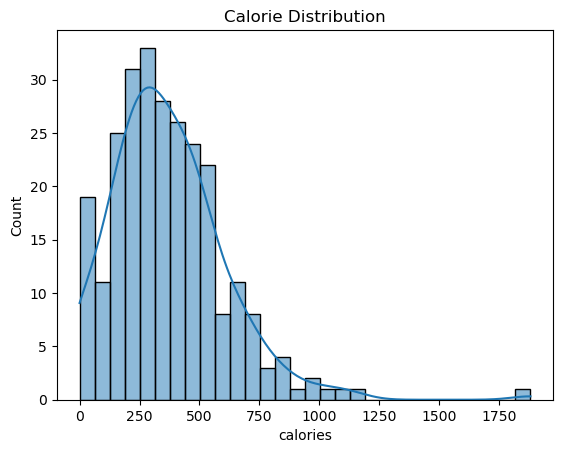

In [19]:
# Distribution plot: Calories
plt.figure()
sns.histplot(df["calories"], bins=30, kde=True)
plt.title("Calorie Distribution")
plt.show()


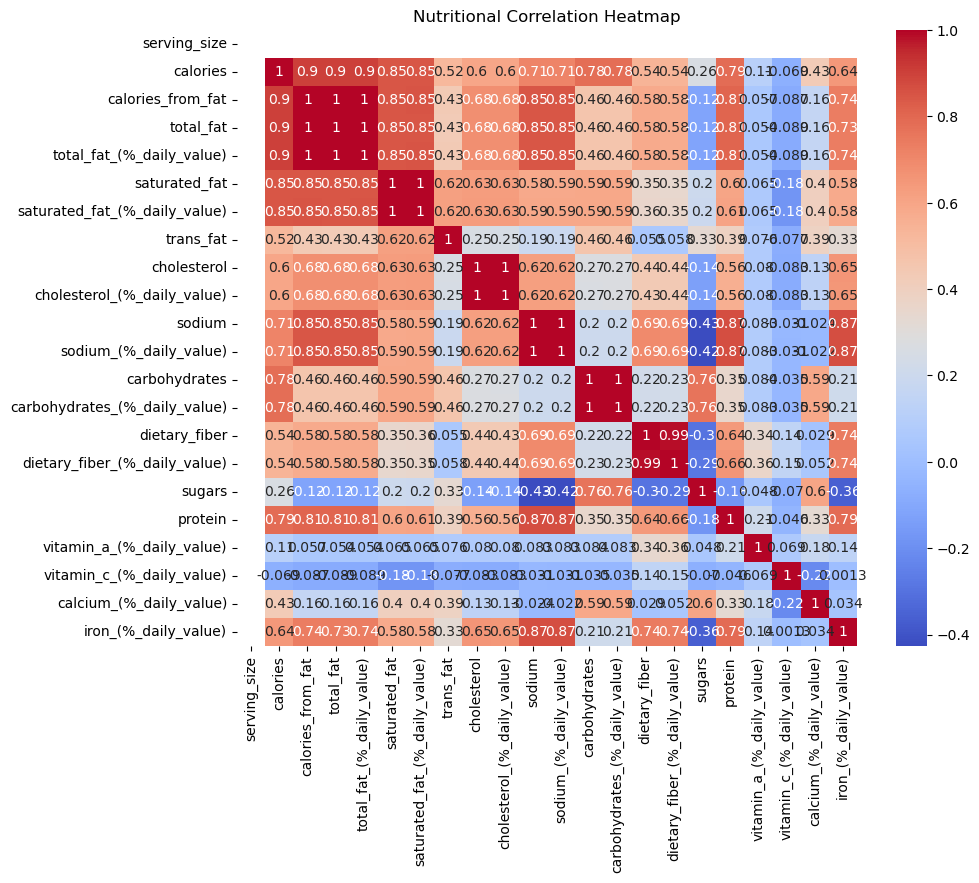

In [20]:
# Heatmap: Nutrient correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Nutritional Correlation Heatmap")
plt.show()

# 6. Actionable Recommendations (Data-Driven Logic)

In [21]:
# Identify high-calorie, low-protein items
df["calorie_to_protein_ratio"] = df["calories"] / (df["protein"] + 1)

risk_items = df.sort_values(by="calorie_to_protein_ratio", ascending=False).head(10)
print("Items with poor calorie-to-protein ratio:")
print(risk_items[["item", "calories", "protein", "calorie_to_protein_ratio"]])

Items with poor calorie-to-protein ratio:
                           item  calories  protein  calorie_to_protein_ratio
112   Coca-Cola Classic (Large)       280        0                     280.0
128              Sprite (Large)       280        0                     280.0
120           Dr Pepper (Large)       270        0                     270.0
111  Coca-Cola Classic (Medium)       200        0                     200.0
127             Sprite (Medium)       200        0                     200.0
119          Dr Pepper (Medium)       190        0                     190.0
110   Coca-Cola Classic (Small)       140        0                     140.0
126              Sprite (Small)       140        0                     140.0
118           Dr Pepper (Small)       140        0                     140.0
143           Sweet Tea (Large)       220        1                     110.0


In [22]:
# Healthier menu candidates
healthy_items = df[
    (df["calories"] < df["calories"].median()) &
    (df["protein"] > df["protein"].median())
].sort_values(by="protein", ascending=False)

print("Health-oriented menu items:")
print(healthy_items[["item", "calories", "protein"]].head(10))

Health-oriented menu items:
                                                  item  calories  protein
86      Premium Bacon Ranch Salad with Grilled Chicken       220       29
89        Premium Southwest Salad with Grilled Chicken       290       27
1                                    Egg White Delight       250       18
0                                         Egg McMuffin       300       17
177  Nonfat Latte with Sugar Free French Vanilla Sy...       220       16
91           Chipotle BBQ Snack Wrap (Grilled Chicken)       260       16
93          Honey Mustard Snack Wrap (Grilled Chicken)       250       16
95                  Ranch Snack Wrap (Grilled Chicken)       280       16
171                      Nonfat Hazelnut Latte (Large)       310       16
168                       Nonfat Caramel Latte (Large)       310       16


#### Calories by Category

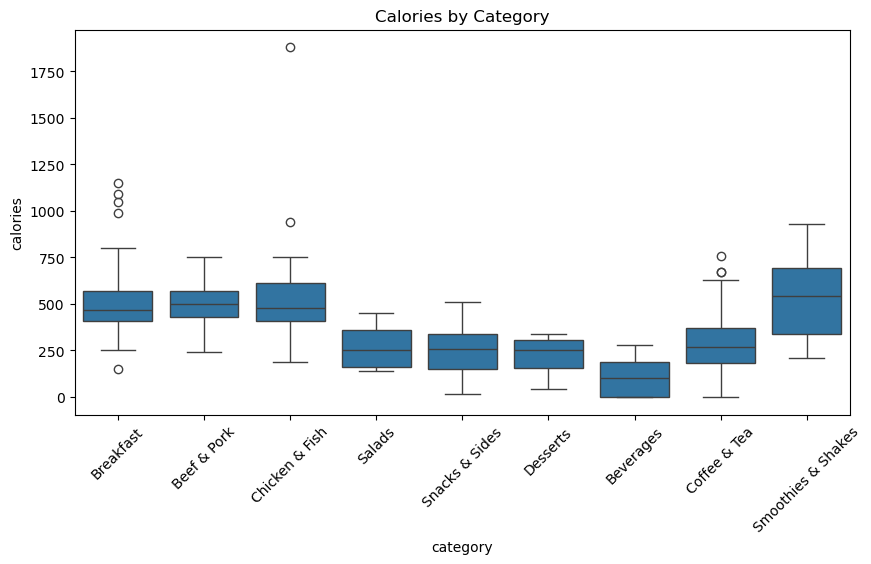

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='category', y='calories', data=df)
plt.xticks(rotation=45)
plt.title('Calories by Category')
plt.show()


#### Business Insights
Key Findings

Certain categories dominate product count

High calorie items cluster in specific categories

Strong dependency between calories & fat

Nutritional imbalance in many products

## Description

Performed exploratory data analysis on retail menu data to uncover product distribution patterns, nutritional trends, and category-wise performance. Applied data cleaning, descriptive statistics, correlation analysis, and data visualization techniques using Python, Pandas, Seaborn, and Matplotlib. Generated actionable business insights to support healthier product positioning and menu optimization strategies.

# Completed